In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

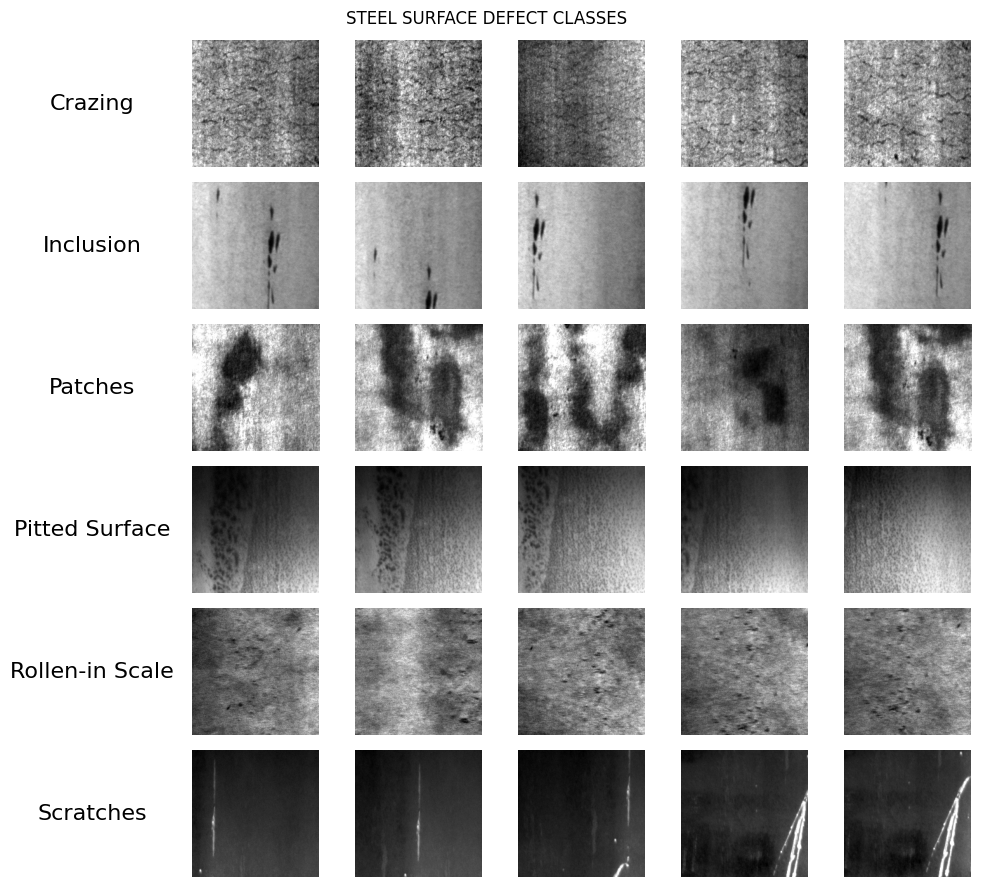

In [63]:

def preprocess(img, typ = None):
    if typ:
        if typ == "histogram_equalize":
            img = cv2.equalizeHist(img)
        elif typ == ""
    else:
        return img
    


def plot_classes_grid(classes, num_images=5, pre_process = None):
    num_classes = len(classes)
    rows = num_classes
    cols = num_images + 1  # +1 for the class label text
    class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted Surface', 'Rolled-in Scale', 'Scratches']
    plt.figure(figsize=(10, 1.5 * rows))

    for i, clas in enumerate(classes):
        # Plot the class label
        plt.subplot(rows, cols, i * cols + 1)
        plt.text(0.5, 0.5, class_names[i], fontsize=16, ha='center', va='center')
        plt.axis('off')

        # Plot the images
        for j in range(1, num_images + 1):  # Start index from 1
            plt.subplot(rows, cols, i * cols + j + 1)  # Adjust subplot index
            image_path = "C:\\Users\\Varshil\\GANLAB\\NEU-CLS" + "\\" + f"{clas}_{j}.bmp"  # Assuming images are named with an index
            try:
                image = plt.imread(image_path)
                if pre_process:
                    image = preprocess()
                    
                plt.imshow(image, cmap='gray')
            except FileNotFoundError:
                plt.text(0.5, 0.5, "No Image", fontsize=8, ha='center', va='center')
            plt.axis('off')

    plt.suptitle("STEEL SURFACE DEFECT CLASSES")
    plt.tight_layout()
    plt.show()

# Example usage
plot_classes_grid(['Cr', 'In', 'Pa', 'PS', 'RS', 'Sc'])

### Exploring different Pre-processing Methods

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(file):
    # Load the image
    image = cv2.imread(f"C:\\Users\\Varshil\\GANLAB\\NEU-CLS\\{file}_1.bmp" , cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # 1️⃣ Histogram Equalization (for contrast enhancement)
    equalized = cv2.equalizeHist(gray)
    
    # 2️⃣ Unsharp Masking
    gaussian_blur = cv2.GaussianBlur(equalized, (9, 9), 10.0)
    unsharp_mask = cv2.addWeighted(equalized, 1.5, gaussian_blur, -0.5, 0)
    
    # 3️⃣ High-Pass Filter (sharpens edges)
    high_pass = equalized - cv2.GaussianBlur(equalized, (9, 9), 10)
    
    # 4️⃣ Laplacian Filter (enhances sharpness)
    laplacian = cv2.Laplacian(equalized, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    
    # 5️⃣ Sobel Filter (sharpens edges along X and Y directions)
    sobel_x = cv2.Sobel(equalized, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(equalized, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.convertScaleAbs(sobel_x + sobel_y)
    
    # 6️⃣ Prewitt Filter (alternative to Sobel)
    prewitt_x = cv2.filter2D(equalized, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
    prewitt_y = cv2.filter2D(equalized, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
    prewitt_combined = cv2.convertScaleAbs(prewitt_x + prewitt_y)
    
    # 7️⃣ Difference of Gaussians (DoG)
    gaussian_1 = cv2.GaussianBlur(equalized, (5, 5), 1)
    gaussian_2 = cv2.GaussianBlur(equalized, (5, 5), 2)
    dog = cv2.absdiff(gaussian_1, gaussian_2)
    
    # Display results
    titles = ['Original', 'Histogram Equalized', 'Unsharp Mask', 'High-Pass', 
              'Laplacian', 'Sobel', 'Prewitt', 'DoG']
    images = [gray, equalized, unsharp_mask, high_pass, laplacian, sobel_combined, prewitt_combined, dog]
    
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


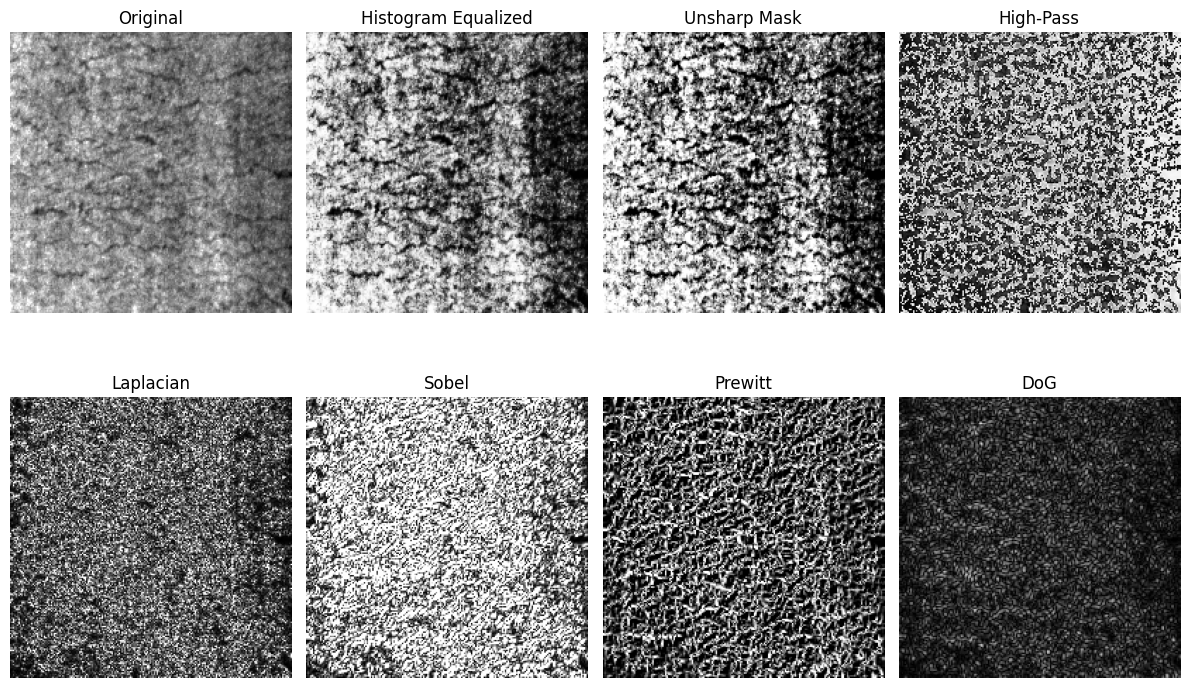

In [9]:
show("Cr")

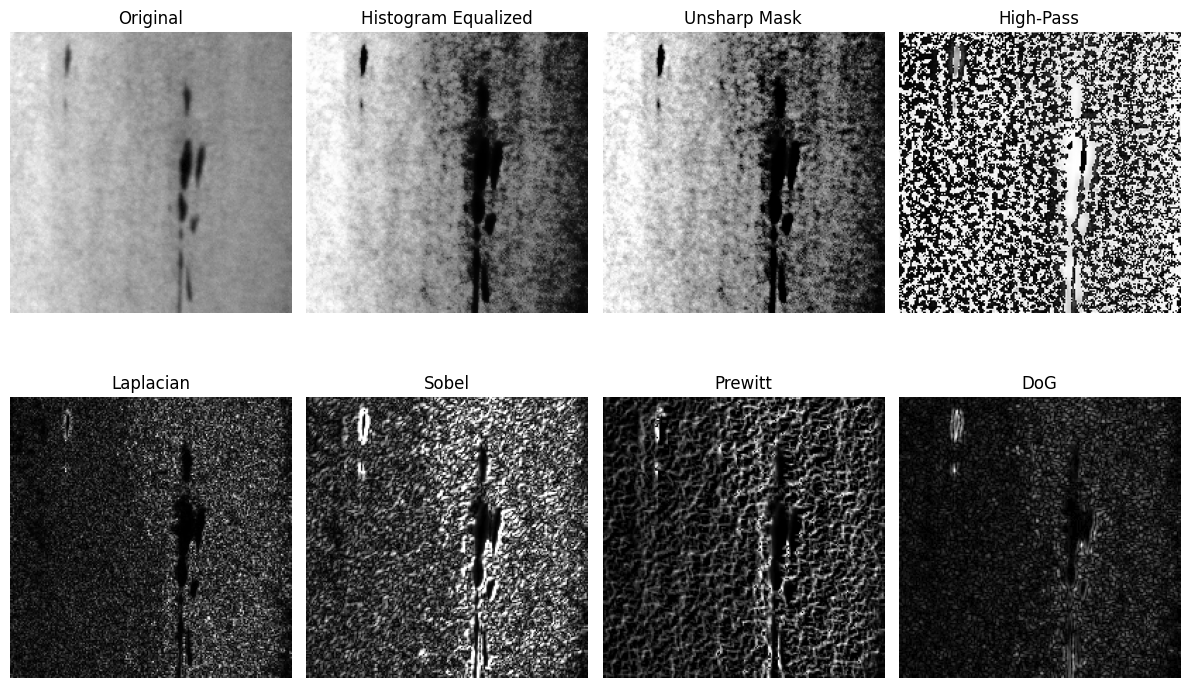

In [10]:
show("In")

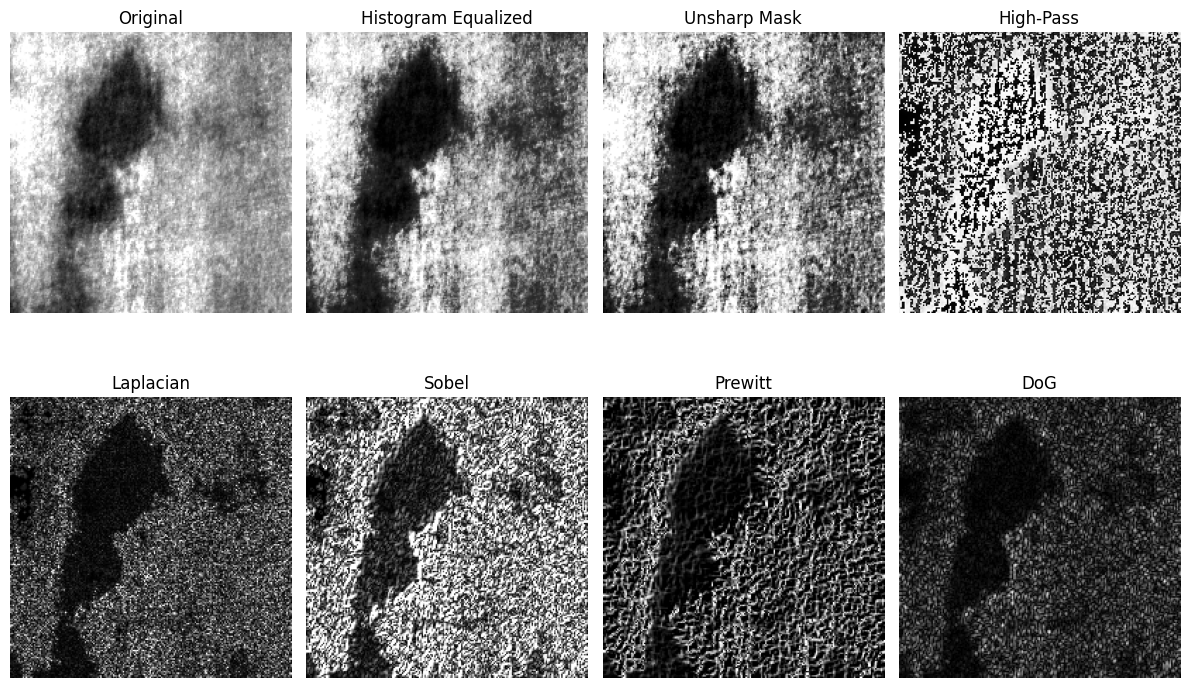

In [11]:
show("Pa")

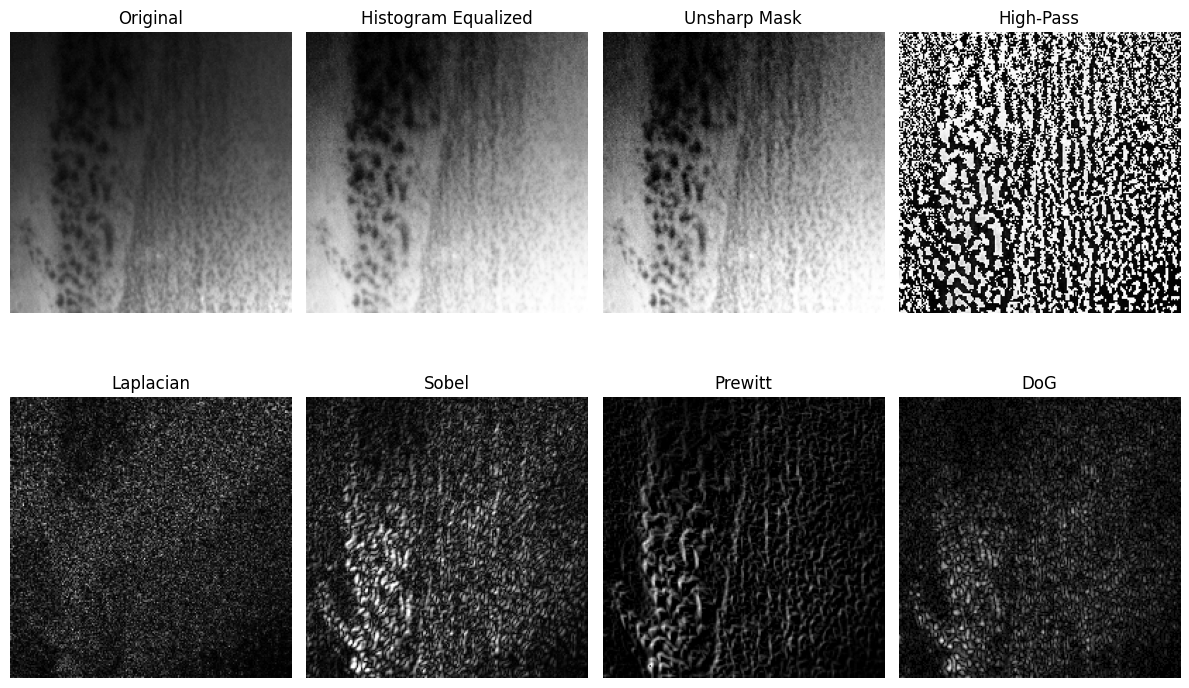

In [12]:
show("PS")

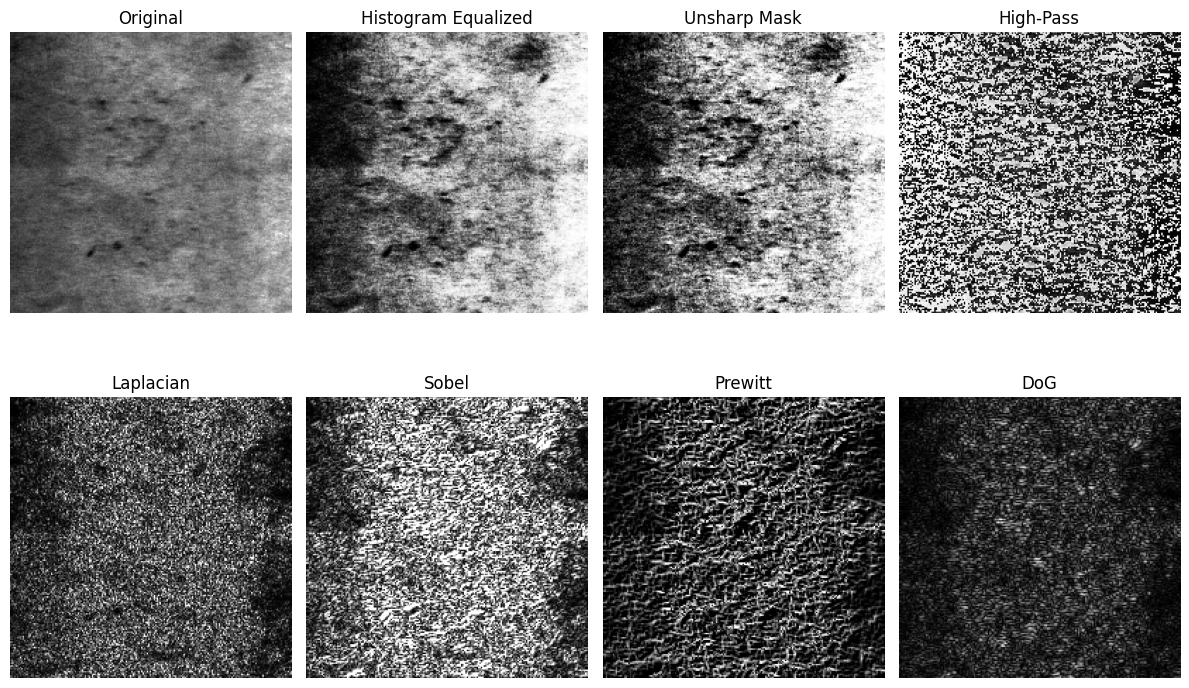

In [14]:
show("RS")

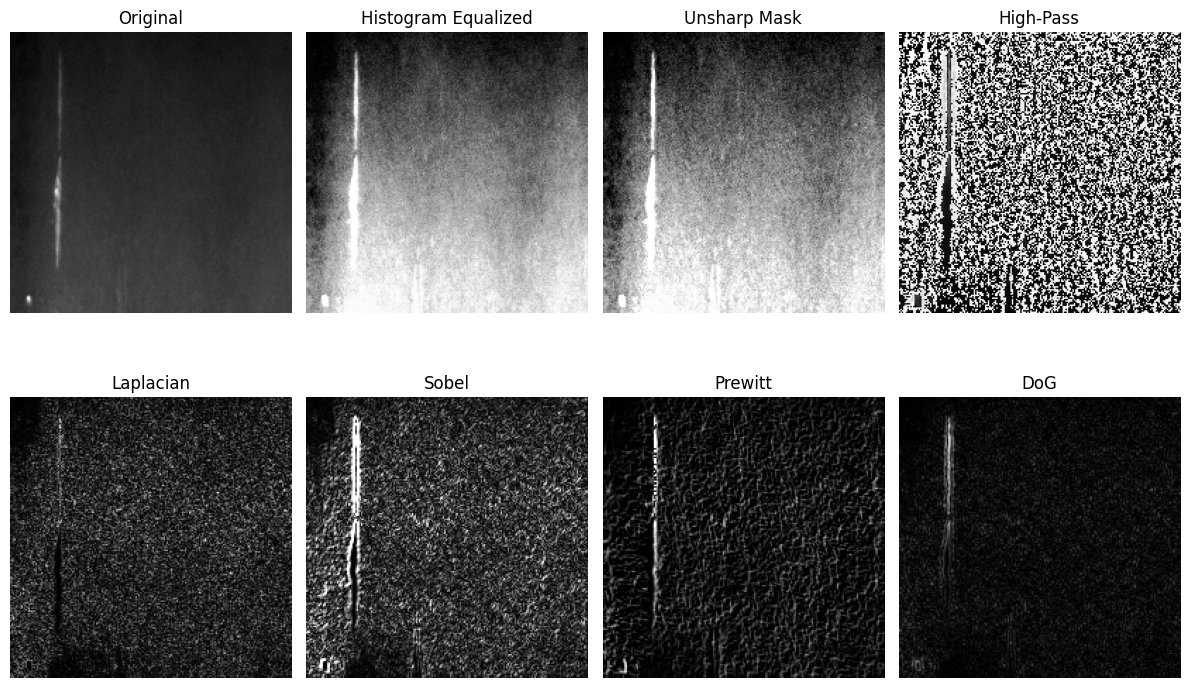

In [15]:
show("Sc")

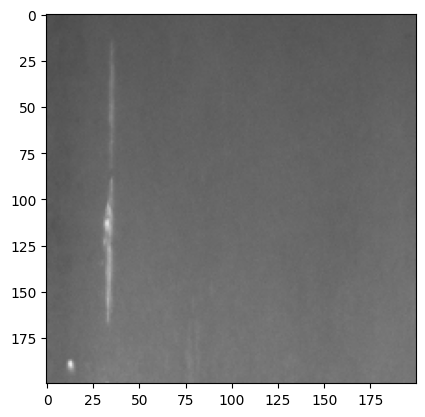

In [44]:
img = cv2.imread("C:\\Users\\Varshil\\GANLAB\\NEU-CLS\\Sc_1.bmp")
#img = 255 - img
plt.imshow(img)

#### Conclusion

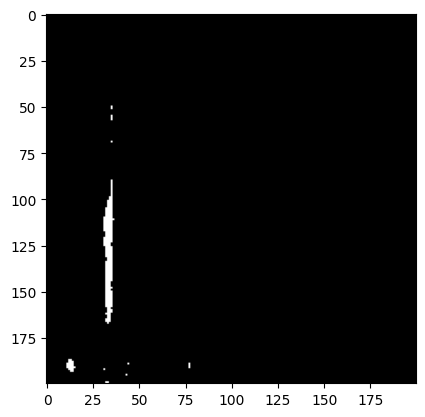

In [45]:
img = np.where(img > 130, 255, 0)
plt.imshow(img)

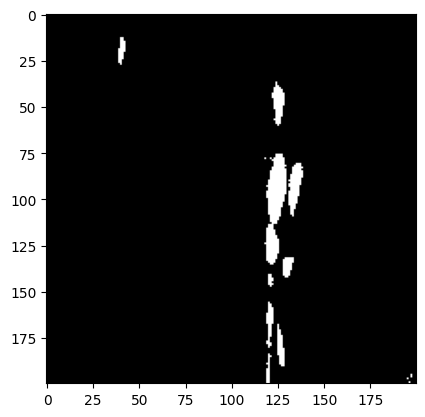

In [53]:
img = cv2.imread("C:\\Users\\Varshil\\GANLAB\\NEU-CLS\\In_1.bmp")
img = np.where(img < 90, 255, 0)
plt.imshow(img)

## Conclusion

1. Crazing, Patches, Pitted Surface and Rolled in Scaled would be applied Histogram Equalization.
2. Inclusion and Scratches will be applied thresholding.